### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [2]:
rating=pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv")

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


userId: Идентификатор пользователя, поставившего оценку.

movieId: Идентификатор фильма, которому поставлена оценка.

rating: Сама оценка (вероятно, от 1 до 5).

timestamp: Время, когда оценка была поставлена.

In [4]:
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


movieId: Идентификатор фильма, которому поставлена оценка.

title: Наименование фильма

genres: Жанр фильма

### Размерность данных

In [6]:
print(rating.shape)

(105339, 4)


In [7]:
print(movies.shape)

(10329, 3)


### Проверка типов данных

In [8]:
print(rating.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


### Проверка на пропущенные значения

In [9]:
print(rating.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [10]:
print(movies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


### Вывод описательной статистики по оценкам

In [11]:
print(rating['rating'].describe())

count    105339.000000
mean          3.516850
std           1.044872
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


### Проверка на дубликаты

In [12]:
print(rating.duplicated().sum())

0


### График "Распределение оценок"

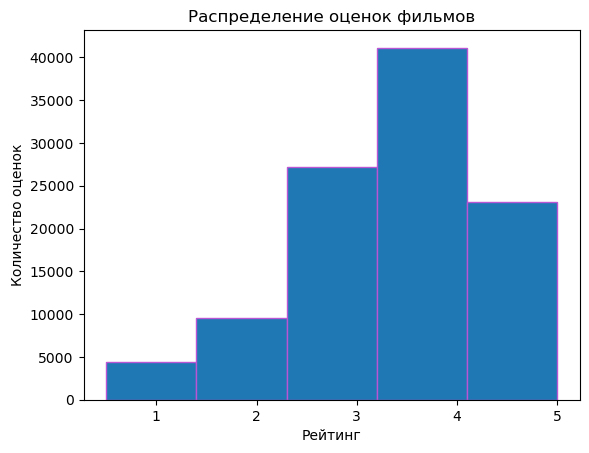

In [13]:
plt.hist(rating['rating'], bins=5, edgecolor='mediumorchid')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Распределение оценок фильмов')
plt.show()

### График "Количество оценок по пользователям"

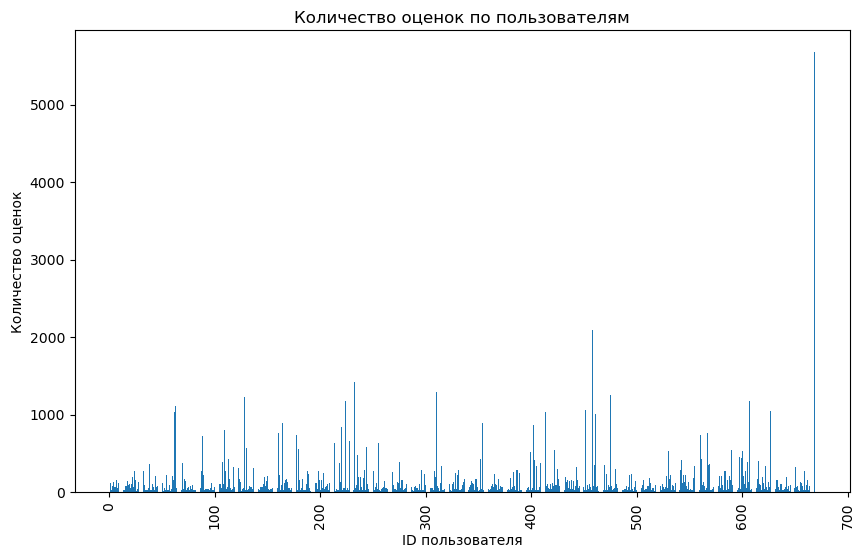

In [14]:
user_counts = rating['userId'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(user_counts.index, user_counts.values)
plt.xlabel('ID пользователя')
plt.ylabel('Количество оценок')
plt.title('Количество оценок по пользователям')
plt.xticks(rotation=90)
plt.show()

### График "Количество оценок по фильмам"

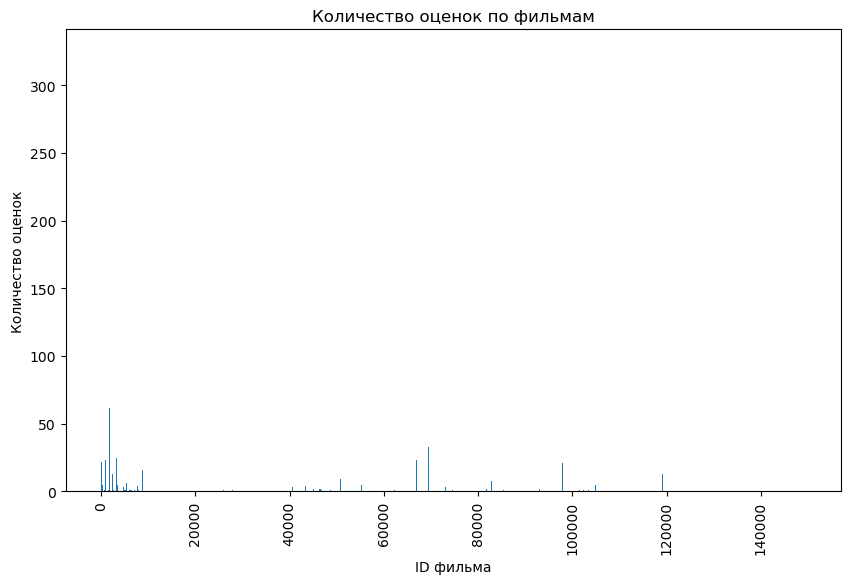

In [15]:
movie_counts = rating['movieId'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(movie_counts.index, movie_counts.values)
plt.xlabel('ID фильма')
plt.ylabel('Количество оценок')
plt.title('Количество оценок по фильмам')
plt.xticks(rotation=90)
plt.show()

### Система рекомендаций на основе взвешенных рейтингов

In [16]:
# Пояснить функцию, вывести рекомендации для др пользователя, добавить для вывода названия фильмов
# Загружаем данные о рейтингах
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 

# Создаем функцию для расчета взвешенного рейтинга
def weighted_rating(df, userId):
    

    # Фильтруем рейтинги, которые уже поставил пользователь
    user_ratings = df[df['userId'] == userId]
    watched_movies = user_ratings['movieId'].unique()

    # Фильтруем фильмы, которые пользователь еще не смотрел
    unwatched_movies = df[~df['movieId'].isin(watched_movies)]['movieId'].unique()

    # Создаем пустой DataFrame для хранения взвешенных рейтингов
    weighted_ratings = pd.DataFrame(columns=['movieId', 'weighted_rating', 'rating_count'])

    # Перебираем фильмы, которые пользователь еще не смотрел
    for i, movieId in enumerate(unwatched_movies):
        # Фильтруем рейтинги для текущего фильма
        movie_ratings = df[df['movieId'] == movieId]

        # Вычисляем средний рейтинг фильма
        average_rating = movie_ratings['rating'].mean()

        # Вычисляем количество оценок фильма
        rating_count = len(movie_ratings)

        # Вычисляем взвешенный рейтинг
        weighted_rating_value = average_rating * rating_count / (rating_count + 10)

        # Добавляем фильм в DataFrame с взвешенным рейтингом
        weighted_ratings.loc[i] = [movieId, weighted_rating_value, rating_count]

    # Сортируем фильмы по убыванию взвешенного рейтинга
    weighted_ratings = weighted_ratings.sort_values('weighted_rating', ascending=False)

    return weighted_ratings

userId = 1
recommendations = weighted_rating(ratings, userId)

# Выводим 10 лучших рекомендаций
print(recommendations.head(10))

      movieId  weighted_rating  rating_count
514    1193.0         3.993464         143.0
1182   1197.0         3.933702         171.0
293     541.0         3.918675         156.0
301    1200.0         3.898204         157.0
1008    923.0         3.890805          77.0
894    1704.0         3.890000         140.0
291     293.0         3.860390         144.0
305    1291.0         3.841808         167.0
371   58559.0         3.839416         127.0
303    1214.0         3.819277         156.0


movieId: В столбце movieId указаны идентификаторы фильмов, которые рекомендуются для пользователя с user_id = 1.

weighted_rating: В столбце weighted_rating указан взвешенный рейтинг для каждого фильма. 
Этот рейтинг учитывает среднюю оценку фильма (average_rating) и количество оценок (rating_count).

rating_count: В столбце rating_count указано количество оценок, которые были поставлены для каждого фильма.

Система рекомендаций отсортировала фильмы в порядке убывания weighted_rating, 
т.е. рекомендуя сначала фильмы с наиболее высокими взвешенными рейтингами.

Фильм с movieId = 514 имеет наивысший взвешенный рейтинг (1193.0), так как получил 
143 оценки и у него достаточно высокий средний рейтинг.

Фильм с movieId = 1008 имеет меньший взвешенный рейтинг (923.0), хотя и средний рейтинг 
у него довольно высокий, но количество оценок намного меньше (всего 77 оценок).

### Система рекомендаций на основе взвешенных рейтингов 
(выведены рекомендации для несколких пользователей, добавлено для вывода названия фильмов)

In [27]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Создаем функцию для расчета взвешенного рейтинга
def weighted_rating(df, userId):
    # Фильтруем рейтинги, которые уже поставил пользователь
    user_ratings = df[df['userId'] == userId]
    watched_movies = user_ratings['movieId'].unique()

    # Фильтруем фильмы, которые пользователь еще не смотрел
    unwatched_movies = df[~df['movieId'].isin(watched_movies)]['movieId'].unique()

    # Создаем пустой DataFrame для хранения взвешенных рейтингов
    weighted_ratings = pd.DataFrame(columns=['movieId', 'weighted_rating', 'rating_count'])

    # Перебираем фильмы, которые пользователь еще не смотрел
    for i, movieId in enumerate(unwatched_movies):
        # Фильтруем рейтинги для текущего фильма
        movie_ratings = df[df['movieId'] == movieId]

        # Вычисляем средний рейтинг фильма
        average_rating = movie_ratings['rating'].mean()

        # Вычисляем количество оценок фильма
        rating_count = len(movie_ratings)

        # Вычисляем взвешенный рейтинг
        weighted_rating_value = average_rating * rating_count / (rating_count + 10)

        # Добавляем фильм в DataFrame с взвешенным рейтингом
        weighted_ratings.loc[i] = [movieId, weighted_rating_value, rating_count]

    # Сортируем фильмы по убыванию взвешенного рейтинга
    weighted_ratings = weighted_ratings.sort_values('weighted_rating', ascending=False)

    # Добавляем названия фильмов
    weighted_ratings = weighted_ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')

    return weighted_ratings

# Выводим рекомендации для разных пользователей
user_ids = [1, 12, 33]
for userId in user_ids:
    recommendations = weighted_rating(ratings, userId)
    print(f"Рекомендации для пользователя {userId}:\n")
    print(recommendations.head(10)) 
    print()

Рекомендации для пользователя 1:

   movieId  weighted_rating  rating_count  \
0   1193.0         3.993464         143.0   
1   1197.0         3.933702         171.0   
2    541.0         3.918675         156.0   
3   1200.0         3.898204         157.0   
4    923.0         3.890805          77.0   
5   1704.0         3.890000         140.0   
6    293.0         3.860390         144.0   
7   1291.0         3.841808         167.0   
8  58559.0         3.839416         127.0   
9   1214.0         3.819277         156.0   

                                               title  
0             One Flew Over the Cuckoo's Nest (1975)  
1                         Princess Bride, The (1987)  
2                                Blade Runner (1982)  
3                                      Aliens (1986)  
4                                Citizen Kane (1941)  
5                           Good Will Hunting (1997)  
6  Léon: The Professional (a.k.a. The Professiona...  
7          Indiana Jones and t

### Наглядный график рекомендаций

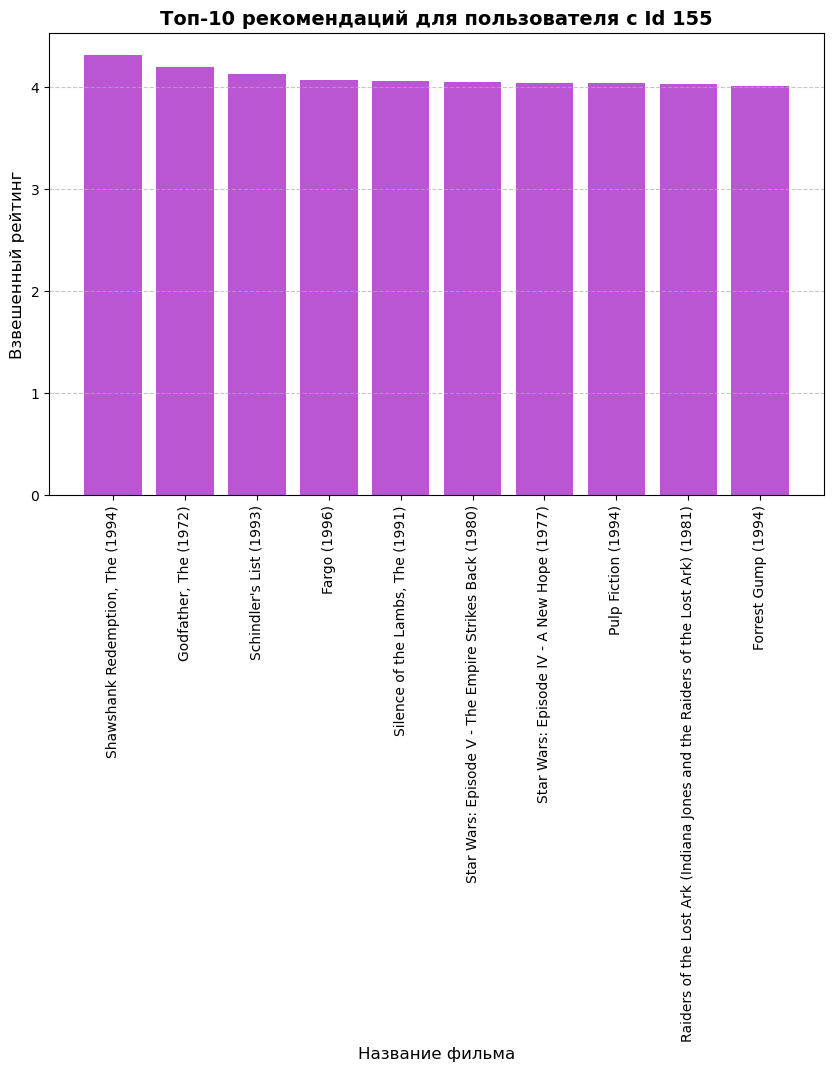

In [30]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Создаем функцию для расчета взвешенного рейтинга
def weighted_rating(df, userId):
    # Фильтруем рейтинги, которые уже поставил пользователь
    user_ratings = df[df['userId'] == userId]
    watched_movies = user_ratings['movieId'].unique()

    # Фильтруем фильмы, которые пользователь еще не смотрел
    unwatched_movies = df[~df['movieId'].isin(watched_movies)]['movieId'].unique()

    # Создаем пустой DataFrame для хранения взвешенных рейтингов
    weighted_ratings = pd.DataFrame(columns=['movieId', 'weighted_rating', 'rating_count'])

    # Перебираем фильмы, которые пользователь еще не смотрел
    for i, movieId in enumerate(unwatched_movies):
        # Фильтруем рейтинги для текущего фильма
        movie_ratings = df[df['movieId'] == movieId]

        # Вычисляем средний рейтинг фильма
        average_rating = movie_ratings['rating'].mean()

        # Вычисляем количество оценок фильма
        rating_count = len(movie_ratings)

        # Вычисляем взвешенный рейтинг
        weighted_rating_value = average_rating * rating_count / (rating_count + 10)

        # Добавляем фильм в DataFrame с взвешенным рейтингом
        weighted_ratings.loc[i] = [movieId, weighted_rating_value, rating_count]

    # Сортируем фильмы по убыванию взвешенного рейтинга
    weighted_ratings = weighted_ratings.sort_values('weighted_rating', ascending=False)

    # Добавляем названия фильмов
    weighted_ratings = weighted_ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')

    return weighted_ratings

userId = 155
recommendations = weighted_rating(ratings, userId)

plt.figure(figsize=(10, 6))
plt.bar(recommendations['title'].head(10), recommendations['weighted_rating'].head(10), 
        color='mediumorchid') 
plt.xlabel('Название фильма', fontsize=12)  
plt.ylabel('Взвешенный рейтинг', fontsize=12)  
plt.title('Топ-10 рекомендаций для пользователя с Id 155', fontsize=14, fontweight='bold') 
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку
plt.show()

### Список топ-10 популярных фильмов

In [18]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 

movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Подсчет количества оценок для каждого фильма
popular_movies = ratings['movieId'].value_counts().nlargest(10)

# Соединение данных о популярности с названиями фильмов
popular_movies = popular_movies.to_frame(name='count')
popular_movies = popular_movies.merge(movies[['movieId', 'title']], on='movieId', how='left')

# Вывод 10 самых популярных фильмов с названиями
print("Топ-10 самых популярных фильмов:\n", popular_movies[['title', 'count']])

Топ-10 самых популярных фильмов:
                                        title  count
0                        Pulp Fiction (1994)    325
1                        Forrest Gump (1994)    311
2           Shawshank Redemption, The (1994)    308
3                       Jurassic Park (1993)    294
4           Silence of the Lambs, The (1991)    290
5  Star Wars: Episode IV - A New Hope (1977)    273
6                         Matrix, The (1999)    261
7          Terminator 2: Judgment Day (1991)    253
8                          Braveheart (1995)    248
9                    Schindler's List (1993)    248


Фильм Pulp Fiction является самым популярным, потому что он получил 325 оценок.

Фильм Forrest Gump является вторым по популярности, так как он получил 311 оценок.

Фильм Braveheart и Schindler's List имеют одинаковое количество оценок (248), поэтому они разделены в списке на равные позиции.

### Рекомендательная система по жанру

In [31]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Создаем функцию для расчета взвешенного рейтинга
def weighted_rating(df, userId):
    # Фильтруем рейтинги, которые уже поставил пользователь
    user_ratings = df[df['userId'] == userId]
    watched_movies = user_ratings['movieId'].unique()

    # Фильтруем фильмы, которые пользователь еще не смотрел
    unwatched_movies = df[~df['movieId'].isin(watched_movies)]['movieId'].unique()

    # Создаем пустой DataFrame для хранения взвешенных рейтингов
    weighted_ratings = pd.DataFrame(columns=['movieId', 'weighted_rating', 'rating_count'])

    # Перебираем фильмы, которые пользователь еще не смотрел
    for i, movieId in enumerate(unwatched_movies):
        # Фильтруем рейтинги для текущего фильма
        movie_ratings = df[df['movieId'] == movieId]

        # Вычисляем средний рейтинг фильма
        average_rating = movie_ratings['rating'].mean()

        # Вычисляем количество оценок фильма
        rating_count = len(movie_ratings)

        # Вычисляем взвешенный рейтинг
        weighted_rating_value = average_rating * rating_count / (rating_count + 10)

        # Добавляем фильм в DataFrame с взвешенным рейтингом
        weighted_ratings.loc[i] = [movieId, weighted_rating_value, rating_count]

    # Сортируем фильмы по убыванию взвешенного рейтинга
    weighted_ratings = weighted_ratings.sort_values('weighted_rating', ascending=False)

    # Добавляем названия фильмов
    weighted_ratings = weighted_ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')

    return weighted_ratings

def recommend_by_genre(user_id, genre, n=10):

    # Фильтруем фильмы по жанру
    genre_movies = movies[movies['genres'].str.contains(genre)]

    # Выбираем фильмы, которые пользователь еще не смотрел
    user_ratings = ratings[ratings['userId'] == user_id]
    watched_movies = user_ratings['movieId'].unique()
    unwatched_genre_movies = genre_movies[~genre_movies['movieId'].isin(watched_movies)]['movieId']

    # Выбираем топ-n фильмов по взвешенному рейтингу
    # Используем функцию weighted_rating() для получения рекомендаций
    recommendations = weighted_rating(ratings, user_id) 

    # Фильтруем рекомендации по жанру и несмотренным фильмам
    recommendations = recommendations[recommendations['movieId'].isin(unwatched_genre_movies)].head(n)

    return recommendations

user_id = 1
genre = "Comedy"
recommendations = recommend_by_genre(user_id, genre)
print("Рекомендации по жанру {}:\n".format(genre), recommendations[['title', 'weighted_rating']]) 

Рекомендации по жанру Comedy:
                                                 title  weighted_rating
1                          Princess Bride, The (1987)         3.933702
13  Dr. Strangelove or: How I Learned to Stop Worr...         3.811111
16  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...         3.759690
22                                   Toy Story (1995)         3.745868
23         Life Is Beautiful (La Vita è bella) (1997)         3.740964
25                                  Sting, The (1973)         3.724138
27                        Being John Malkovich (1999)         3.716418
29                               Graduate, The (1967)         3.706186
34        Wallace & Gromit: The Wrong Trousers (1993)         3.689655
35                               Trainspotting (1996)         3.685484


### Рекомендательная система по контенту

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 
 
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Извлечение ключевых слов из жанров с помощью nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')  # Загрузка необходимых данных для nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def extract_keywords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmas)

# Используем столбец 'genres' для извлечения ключевых слов
movies['keywords'] = movies['genres'].apply(extract_keywords) 

def recommend_by_content(user_id, movie_id, n=10):

    # Преобразование текстовых данных в векторы
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(movies['genres'] + movies['keywords'])

    # Вычисление косинусной близости 
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Нахождение индекса фильма
    idx = movies[movies['movieId'] == movie_id].index[0]

    # Нахождение похожих фильмов 
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Выбираем топ-n похожих фильмов
    movie_indices = [i[0] for i in sim_scores[1:n+1]]
    recommendations = movies.iloc[movie_indices]  # Теперь мы получаем весь ряд
    # Извлекаем названия фильмов
    recommendations = recommendations['title']

    return recommendations

user_id = 1
movie_id = 514 
recommendations = recommend_by_content(user_id, movie_id)
print("Рекомендации по контенту, похожие на фильм {}:\n".format(movie_id), recommendations)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Рекомендации по контенту, похожие на фильм 514:
 17                                     Four Rooms (1995)
18                 Ace Ventura: When Nature Calls (1995)
60                                       Bio-Dome (1996)
63                                         Friday (1995)
81                                    Black Sheep (1996)
92                                      Mr. Wrong (1996)
94                                  Happy Gilmore (1996)
103    Happiness Is in the Field (Bonheur est dans le...
111                        Flirting With Disaster (1996)
116                                Down Periscope (1996)
Name: title, dtype: object


### Рекомендации по контенту, похожие на популярные фильмы:

In [32]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Подсчет количества оценок для каждого фильма
popular_movies = ratings['movieId'].value_counts().nlargest(10)

def recommend_popular_movies(user_id):
    # Фильтруем рейтинги пользователя
    user_ratings = ratings[ratings['userId'] == user_id]
    watched_movies = user_ratings['movieId'].unique()

    # Выбираем топ-10 самых популярных фильмов, которые пользователь не смотрел
    recommendations = popular_movies[~popular_movies.index.isin(watched_movies)].head(10)

    # Добавляем названия фильмов
    recommendations = recommendations.to_frame(name='count')
    recommendations = recommendations.merge(movies[['movieId', 'title']], on='movieId', how='left')

    return recommendations

user_id = 210
recommendations = recommend_popular_movies(user_id)
print("Рекомендации самых популярных фильмов:\n", recommendations[['title', 'count']]) 

Рекомендации самых популярных фильмов:
                                title  count
0                Pulp Fiction (1994)    325
1                Forrest Gump (1994)    311
2   Shawshank Redemption, The (1994)    308
3               Jurassic Park (1993)    294
4   Silence of the Lambs, The (1991)    290
5  Terminator 2: Judgment Day (1991)    253
6            Schindler's List (1993)    248


Фильм Pulp Fiction - самый популярный из рекомендованных. Он получил 325 оценок.

Остальные фильмы тоже входят в топ-10 популярных фильмов, но пользователь user_id = 210 ещё не смотрел их.

### Реализация коллаборативной фильтрации с помощью KNN:

In [22]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка данных о рейтингах
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 

def recommend_with_knn(user_id, n=10):
    
    # Создаем матрицу оценок
    ratings_matrix = ratings.pivot_table(values='rating', index='userId', columns='movieId', fill_value=0)

    # Создаем объект KNN
    model = NearestNeighbors(metric='cosine', algorithm='brute') 

    # Обучаем модель
    model.fit(ratings_matrix)

    # Находим ближайших соседей
    neighbors = model.kneighbors(ratings_matrix.loc[[user_id]], n_neighbors=5, return_distance=False)[0]

    # Вычисляем среднюю оценку соседей для каждого фильма
    predictions = ratings_matrix.iloc[neighbors].mean(axis=0)

    # Сортируем фильмы по предсказанной оценке
    sorted_predictions = predictions.sort_values(ascending=False)

    # Выбираем топ-n рекомендованных фильмов
    recommendations = sorted_predictions.index.tolist()[:n]

    return recommendations


user_id = 210
recommendations = recommend_with_knn(user_id)
print("Рекомендации по коллаборативной фильтрации:\n", recommendations)

Рекомендации по коллаборативной фильтрации:
 [858, 541, 1617, 608, 1247, 110, 1097, 50, 750, 1136]


[858, 541, 1617, 608, 1247, 110, 1097, 50, 750, 1136]: 
Это список из 10 movieId - идентификаторов фильмов, которые были рекомендованы пользователю с user_id = 210 
на основе коллаборативной фильтрации.

Алгоритм коллаборативной фильтрации (в данном случае, KNN) проанализировал оценки пользователя user_id = 210 
и оценок других пользователей, которые имеют схожие вкусы.
На основе этого анализа алгоритм предсказал, что пользователь user_id = 210 
может поставить высокие оценки фильмам с movieId из этого списка.

### 10 популярных фильмов по жанру "Romance" для пользователя с id 55, которые он не смотрел, на основе просмотренного

In [23]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 

movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Фильтруем фильмы по жанру
genre_movies = movies[movies['genres'].str.contains("Romance")]

# Получаем список фильмов, которые пользователь с ID 55 еще не смотрел
user_id = 55
user_ratings = ratings[ratings['userId'] == user_id]  # Получаем все рейтинги пользователя
watched_movies = user_ratings[user_ratings['movieId'].isin(genre_movies['movieId'])]['movieId'].tolist() # Фильтруем по жанру

# Проверяем, есть ли фильмы, которые пользователь не смотрел, в жанре
unwatched_genre_movies = genre_movies[~genre_movies['movieId'].isin(watched_movies)]['movieId'].tolist()

# Если есть фильмы, которые пользователь не смотрел, то выводим их
if unwatched_genre_movies:
    print("Топ-10 самых популярных романтических фильмов для пользователя с ID 55, которые он не смотрел:")

    # Считаем количество оценок для каждого фильма
    popular_genre_movies = ratings[ratings['movieId'].isin(unwatched_genre_movies)]['movieId'].value_counts().nlargest(10)

    # Соединяем данные о популярности с названиями фильмов
    popular_genre_movies = popular_genre_movies.to_frame(name='count')
    popular_genre_movies = popular_genre_movies.merge(movies[['movieId', 'title']], on='movieId', how='left')

    # Выводим список фильмов
    print(popular_genre_movies[['title', 'count']])
else:
    print("Пользователь с ID 55 уже смотрел все романтические фильмы в датасете.")

Топ-10 самых популярных романтических фильмов для пользователя с ID 55, которые он не смотрел:
                         title  count
0          Forrest Gump (1994)    311
1       American Beauty (1999)    216
2                 Speed (1994)    197
3             True Lies (1994)    184
4   Princess Bride, The (1987)    171
5                 Shrek (2001)    158
6         Groundhog Day (1993)    157
7               Titanic (1997)    153
8          Pretty Woman (1990)    148
9  Beauty and the Beast (1991)    143


### Топ-3 самых популярных жанров для пользователя с ID 70

In [24]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv") 

movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Получаем список всех жанров в датасете
all_genres = set()
for genres in movies['genres']:
    for genre in genres.split('|'):
        all_genres.add(genre)

# Определяем ID пользователя
user_id = 70

# Фильтруем рейтинги пользователя
user_ratings = ratings[ratings['userId'] == user_id]

# Создаем словарь для подсчета популярности жанров
genre_counts = {genre: 0 for genre in all_genres}

# Подсчитываем количество просмотров для каждого жанра
for movie_id in user_ratings['movieId']:
    genres = movies[movies['movieId'] == movie_id]['genres'].iloc[0].split('|')
    for genre in genres:
        genre_counts[genre] += 1

# Сортируем жанры по популярности
sorted_genres = sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)

# Выводим топ-3 самых популярных жанров
print("Топ-3 самых популярных жанров для пользователя с ID {}:".format(user_id))
for genre, count in sorted_genres[:3]:
    print(f"{genre}: {count}")

Топ-3 самых популярных жанров для пользователя с ID 70:
Drama: 16
Adventure: 13
Action: 12


Drama: 16 - Пользователь с ID 70 посмотрел 16 фильмов в жанре “Drama” (драма).

Adventure: 13 - Пользователь посмотрел 13 фильмов в жанре “Adventure” (приключения).

Action: 12 - Пользователь посмотрел 12 фильмов в жанре “Action” (боевик).

### Пользователи с похожими вкусами с пользователем, имеющий id 5, и их просмотры

In [25]:
ratings = pd.read_csv("C:/Users/Adeli/Downloads/2/ratings.csv")
movies = pd.read_csv("C:/Users/Adeli/Downloads/2/movies.csv")

# Определение ID пользователя, чьи вкусы мы хотим сравнить
target_user_id = 5

# Создание матрицы "пользователь-фильм"
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Вычисление косинусной близости между пользователями
cosine_sim = cosine_similarity(user_movie_matrix)

# Нахождение пользователей с похожими вкусами
sim_scores = list(enumerate(cosine_sim[target_user_id]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Выбираем топ-5 пользователей с наибольшим сходством
top_similar_users = [user_id for user_id, score in sim_scores[1:6]]  # Исключаем самого себя

# Выводим информацию о пользователях с похожими вкусами
print("Пользователи с похожими вкусами:")
for user_id in top_similar_users:
    print(f"Пользователь {user_id}:")
    user_ratings = ratings[ratings['userId'] == user_id]
    user_watched_movies = user_ratings.merge(movies, on='movieId', how='left')['title'].tolist()
    print(f"Просмотренные фильмы: {', '.join(user_watched_movies)}")
    print()

Пользователи с похожими вкусами:
Пользователь 194:
Просмотренные фильмы: Heat (1995), Seven (a.k.a. Se7en) (1995), Usual Suspects, The (1995), Crossing Guard, The (1995), Bad Boys (1995), Apollo 13 (1995), Congo (1995), Pulp Fiction (1994), Shawshank Redemption, The (1994), While You Were Sleeping (1995), Four Weddings and a Funeral (1994), Speed (1994), Fugitive, The (1993), Jurassic Park (1993), Mrs. Doubtfire (1993), Ghost (1990), Aladdin (1992), Beauty and the Beast (1991), Pretty Woman (1990), Dead Man (1995), Rock, The (1996), Stealing Beauty (1996), Foxfire (1996), Jude (1996), Everyone Says I Love You (1996), English Patient, The (1996), Back to the Future (1985), Down by Law (1986), Night on Earth (1991), When Harry Met Sally... (1989), 101 Dalmatians (1996), Scream (1996), Addicted to Love (1997), My Best Friend's Wedding (1997), Picture Perfect (1997), Conspiracy Theory (1997), Seven Years in Tibet (1997), Kiss the Girls (1997), Jackie Brown (1997), Great Expectations (1998)